# Spaceship Titanic

## Importing libs and the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [3]:
train_df.shape, test_df.shape

((8693, 14), (4277, 13))

In [4]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [8]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## Data Cleaning and Transformation

In [9]:
train_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [10]:
test_df.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [11]:
train_df['HomePlanet'].unique(), test_df['HomePlanet'].unique()

(array(['Europa', 'Earth', 'Mars', nan], dtype=object),
 array(['Earth', 'Europa', 'Mars', nan], dtype=object))

In [12]:
import random

planet_choices = ['Europa', 'Earth', 'Mars']

train_df['HomePlanet'].fillna(random.choice(planet_choices), inplace=True)
test_df['HomePlanet'].fillna(random.choice(planet_choices), inplace=True)

In [13]:
train_df.isna().sum(), test_df.isna().sum()

(PassengerId       0
 HomePlanet        0
 CryoSleep       217
 Cabin           199
 Destination     182
 Age             179
 VIP             203
 RoomService     181
 FoodCourt       183
 ShoppingMall    208
 Spa             183
 VRDeck          188
 Name            200
 Transported       0
 dtype: int64,
 PassengerId       0
 HomePlanet        0
 CryoSleep        93
 Cabin           100
 Destination      92
 Age              91
 VIP              93
 RoomService      82
 FoodCourt       106
 ShoppingMall     98
 Spa             101
 VRDeck           80
 Name             94
 dtype: int64)

In [14]:
train_df['Cabin'].mode()

0    G/734/S
dtype: object

In [15]:
train_df['Cabin'].fillna('G/734/S', inplace=True)
test_df['Cabin'].fillna('G/734/S', inplace=True)

In [16]:
train_df.isna().sum(), test_df.isna().sum()

(PassengerId       0
 HomePlanet        0
 CryoSleep       217
 Cabin             0
 Destination     182
 Age             179
 VIP             203
 RoomService     181
 FoodCourt       183
 ShoppingMall    208
 Spa             183
 VRDeck          188
 Name            200
 Transported       0
 dtype: int64,
 PassengerId       0
 HomePlanet        0
 CryoSleep        93
 Cabin             0
 Destination      92
 Age              91
 VIP              93
 RoomService      82
 FoodCourt       106
 ShoppingMall     98
 Spa             101
 VRDeck           80
 Name             94
 dtype: int64)

In [17]:
train_df['CryoSleep'].unique()

array([False, True, nan], dtype=object)

In [18]:
choices = [True, False]

train_df['CryoSleep'].fillna(random.choice(choices), inplace=True)
test_df['CryoSleep'].fillna(random.choice(choices), inplace=True)

In [19]:
train_df.isna().sum(), test_df.isna().sum()

(PassengerId       0
 HomePlanet        0
 CryoSleep         0
 Cabin             0
 Destination     182
 Age             179
 VIP             203
 RoomService     181
 FoodCourt       183
 ShoppingMall    208
 Spa             183
 VRDeck          188
 Name            200
 Transported       0
 dtype: int64,
 PassengerId       0
 HomePlanet        0
 CryoSleep         0
 Cabin             0
 Destination      92
 Age              91
 VIP              93
 RoomService      82
 FoodCourt       106
 ShoppingMall     98
 Spa             101
 VRDeck           80
 Name             94
 dtype: int64)

In [20]:
train_df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [21]:
destination_choices = ['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e']

train_df['Destination'].fillna(random.choice(destination_choices), inplace=True)
test_df['Destination'].fillna(random.choice(destination_choices), inplace=True)

In [22]:
train_df.isna().sum(), test_df.isna().sum()

(PassengerId       0
 HomePlanet        0
 CryoSleep         0
 Cabin             0
 Destination       0
 Age             179
 VIP             203
 RoomService     181
 FoodCourt       183
 ShoppingMall    208
 Spa             183
 VRDeck          188
 Name            200
 Transported       0
 dtype: int64,
 PassengerId       0
 HomePlanet        0
 CryoSleep         0
 Cabin             0
 Destination       0
 Age              91
 VIP              93
 RoomService      82
 FoodCourt       106
 ShoppingMall     98
 Spa             101
 VRDeck           80
 Name             94
 dtype: int64)

In [23]:
train_df['Age'].mean()

28.82793046746535

In [24]:
train_df['Age'].fillna(29, inplace=True)
test_df['Age'].fillna(29, inplace=True)

In [25]:
train_df.isna().sum(), test_df.isna().sum()

(PassengerId       0
 HomePlanet        0
 CryoSleep         0
 Cabin             0
 Destination       0
 Age               0
 VIP             203
 RoomService     181
 FoodCourt       183
 ShoppingMall    208
 Spa             183
 VRDeck          188
 Name            200
 Transported       0
 dtype: int64,
 PassengerId       0
 HomePlanet        0
 CryoSleep         0
 Cabin             0
 Destination       0
 Age               0
 VIP              93
 RoomService      82
 FoodCourt       106
 ShoppingMall     98
 Spa             101
 VRDeck           80
 Name             94
 dtype: int64)

In [26]:
train_df['VIP'].unique()

array([False, True, nan], dtype=object)

In [27]:
import random

vip_choices = [True, False]

train_df['VIP'].fillna(random.choice(vip_choices), inplace=True)
test_df['VIP'].fillna(random.choice(vip_choices), inplace=True)

In [28]:
train_df.isna().sum(), test_df.isna().sum()

(PassengerId       0
 HomePlanet        0
 CryoSleep         0
 Cabin             0
 Destination       0
 Age               0
 VIP               0
 RoomService     181
 FoodCourt       183
 ShoppingMall    208
 Spa             183
 VRDeck          188
 Name            200
 Transported       0
 dtype: int64,
 PassengerId       0
 HomePlanet        0
 CryoSleep         0
 Cabin             0
 Destination       0
 Age               0
 VIP               0
 RoomService      82
 FoodCourt       106
 ShoppingMall     98
 Spa             101
 VRDeck           80
 Name             94
 dtype: int64)

In [29]:
train_df['RoomService'].mode()

0    0.0
dtype: float64

In [30]:
train_df['RoomService'].fillna(0, inplace=True)
test_df['RoomService'].fillna(0, inplace=True)

In [31]:
train_df.isna().sum(), test_df.isna().sum()

(PassengerId       0
 HomePlanet        0
 CryoSleep         0
 Cabin             0
 Destination       0
 Age               0
 VIP               0
 RoomService       0
 FoodCourt       183
 ShoppingMall    208
 Spa             183
 VRDeck          188
 Name            200
 Transported       0
 dtype: int64,
 PassengerId       0
 HomePlanet        0
 CryoSleep         0
 Cabin             0
 Destination       0
 Age               0
 VIP               0
 RoomService       0
 FoodCourt       106
 ShoppingMall     98
 Spa             101
 VRDeck           80
 Name             94
 dtype: int64)

In [32]:
train_df['FoodCourt'].mode()

0    0.0
dtype: float64

In [33]:
train_df['FoodCourt'].fillna(0, inplace=True)
test_df['FoodCourt'].fillna(0, inplace=True)

In [34]:
train_df.isna().sum(), test_df.isna().sum()

(PassengerId       0
 HomePlanet        0
 CryoSleep         0
 Cabin             0
 Destination       0
 Age               0
 VIP               0
 RoomService       0
 FoodCourt         0
 ShoppingMall    208
 Spa             183
 VRDeck          188
 Name            200
 Transported       0
 dtype: int64,
 PassengerId       0
 HomePlanet        0
 CryoSleep         0
 Cabin             0
 Destination       0
 Age               0
 VIP               0
 RoomService       0
 FoodCourt         0
 ShoppingMall     98
 Spa             101
 VRDeck           80
 Name             94
 dtype: int64)

In [35]:
train_df['ShoppingMall'].mode()

0    0.0
dtype: float64

In [36]:
train_df['ShoppingMall'].fillna(0, inplace=True)
test_df['ShoppingMall'].fillna(0, inplace=True)

In [37]:
train_df.isna().sum(), test_df.isna().sum()

(PassengerId       0
 HomePlanet        0
 CryoSleep         0
 Cabin             0
 Destination       0
 Age               0
 VIP               0
 RoomService       0
 FoodCourt         0
 ShoppingMall      0
 Spa             183
 VRDeck          188
 Name            200
 Transported       0
 dtype: int64,
 PassengerId       0
 HomePlanet        0
 CryoSleep         0
 Cabin             0
 Destination       0
 Age               0
 VIP               0
 RoomService       0
 FoodCourt         0
 ShoppingMall      0
 Spa             101
 VRDeck           80
 Name             94
 dtype: int64)

In [38]:
train_df['Spa'].mode()

0    0.0
dtype: float64

In [39]:
train_df['Spa'].fillna(0, inplace=True)
test_df['Spa'].fillna(0, inplace=True)

In [40]:
train_df.isna().sum(), test_df.isna().sum()

(PassengerId       0
 HomePlanet        0
 CryoSleep         0
 Cabin             0
 Destination       0
 Age               0
 VIP               0
 RoomService       0
 FoodCourt         0
 ShoppingMall      0
 Spa               0
 VRDeck          188
 Name            200
 Transported       0
 dtype: int64,
 PassengerId      0
 HomePlanet       0
 CryoSleep        0
 Cabin            0
 Destination      0
 Age              0
 VIP              0
 RoomService      0
 FoodCourt        0
 ShoppingMall     0
 Spa              0
 VRDeck          80
 Name            94
 dtype: int64)

In [41]:
train_df['VRDeck'].mode()

0    0.0
dtype: float64

In [42]:
train_df['VRDeck'].fillna(0, inplace=True)
test_df['VRDeck'].fillna(0, inplace=True)

In [43]:
train_df.isna().sum(), test_df.isna().sum()

(PassengerId       0
 HomePlanet        0
 CryoSleep         0
 Cabin             0
 Destination       0
 Age               0
 VIP               0
 RoomService       0
 FoodCourt         0
 ShoppingMall      0
 Spa               0
 VRDeck            0
 Name            200
 Transported       0
 dtype: int64,
 PassengerId      0
 HomePlanet       0
 CryoSleep        0
 Cabin            0
 Destination      0
 Age              0
 VIP              0
 RoomService      0
 FoodCourt        0
 ShoppingMall     0
 Spa              0
 VRDeck           0
 Name            94
 dtype: int64)

In [44]:
train_df.drop(['Name'], axis=1, inplace=True)

In [45]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [46]:
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,G/734/S,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,29.0,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,PSO J318.5-22,29.0,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [47]:
for i in train_df.index:
  if train_df['CryoSleep'][i] == True:
    train_df['CryoSleep'][i] = 1
  elif train_df['CryoSleep'][i] == False:
    train_df['CryoSleep'][i] = 0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [48]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [49]:
for i in test_df.index:
  if test_df['CryoSleep'][i] == True:
    test_df['CryoSleep'][i] = 1
  elif test_df['CryoSleep'][i] == False:
    test_df['CryoSleep'][i] = 0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [50]:
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,1,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,0,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,1,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,0,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,0,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,1,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,0,G/734/S,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,1,D/296/P,55 Cancri e,29.0,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,0,D/297/P,PSO J318.5-22,29.0,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [51]:
for i in train_df.index:
  if train_df['VIP'][i] == True:
    train_df['VIP'][i] = 1
  elif train_df['VIP'][i] == False:
    train_df['VIP'][i] = 0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [52]:
for i in train_df.index:
  if train_df['Transported'][i] == True:
    train_df['Transported'][i] = 1
  elif train_df['Transported'][i] == False:
    train_df['Transported'][i] = 0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [53]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,0
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,1
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0


In [54]:
for i in test_df.index:
  if test_df['VIP'][i] == True:
    test_df['VIP'][i] = 1
  elif test_df['VIP'][i] == False:
    test_df['VIP'][i] = 0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [55]:
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,1,G/3/S,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,0,F/4/S,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,1,C/0/S,55 Cancri e,31.0,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,0,C/1/S,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,0,F/5/S,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,1,G/1496/S,TRAPPIST-1e,34.0,0,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,0,G/734/S,TRAPPIST-1e,42.0,0,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,1,D/296/P,55 Cancri e,29.0,0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,0,D/297/P,PSO J318.5-22,29.0,0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [56]:
test_df.drop(['Name'], axis=1, inplace=True)
test_df.drop(['Cabin'], axis=1, inplace=True)

In [57]:
train_df.drop(['PassengerId'], axis=1, inplace=True)

In [58]:
train_df.drop(['Cabin'], axis=1, inplace=True)

In [59]:
train_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0
8689,Earth,1,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,0
8690,Earth,0,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,1
8691,Europa,0,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0


## EDA

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RoomService'}>],
       [<AxesSubplot:title={'center':'FoodCourt'}>,
        <AxesSubplot:title={'center':'ShoppingMall'}>],
       [<AxesSubplot:title={'center':'Spa'}>,
        <AxesSubplot:title={'center':'VRDeck'}>]], dtype=object)

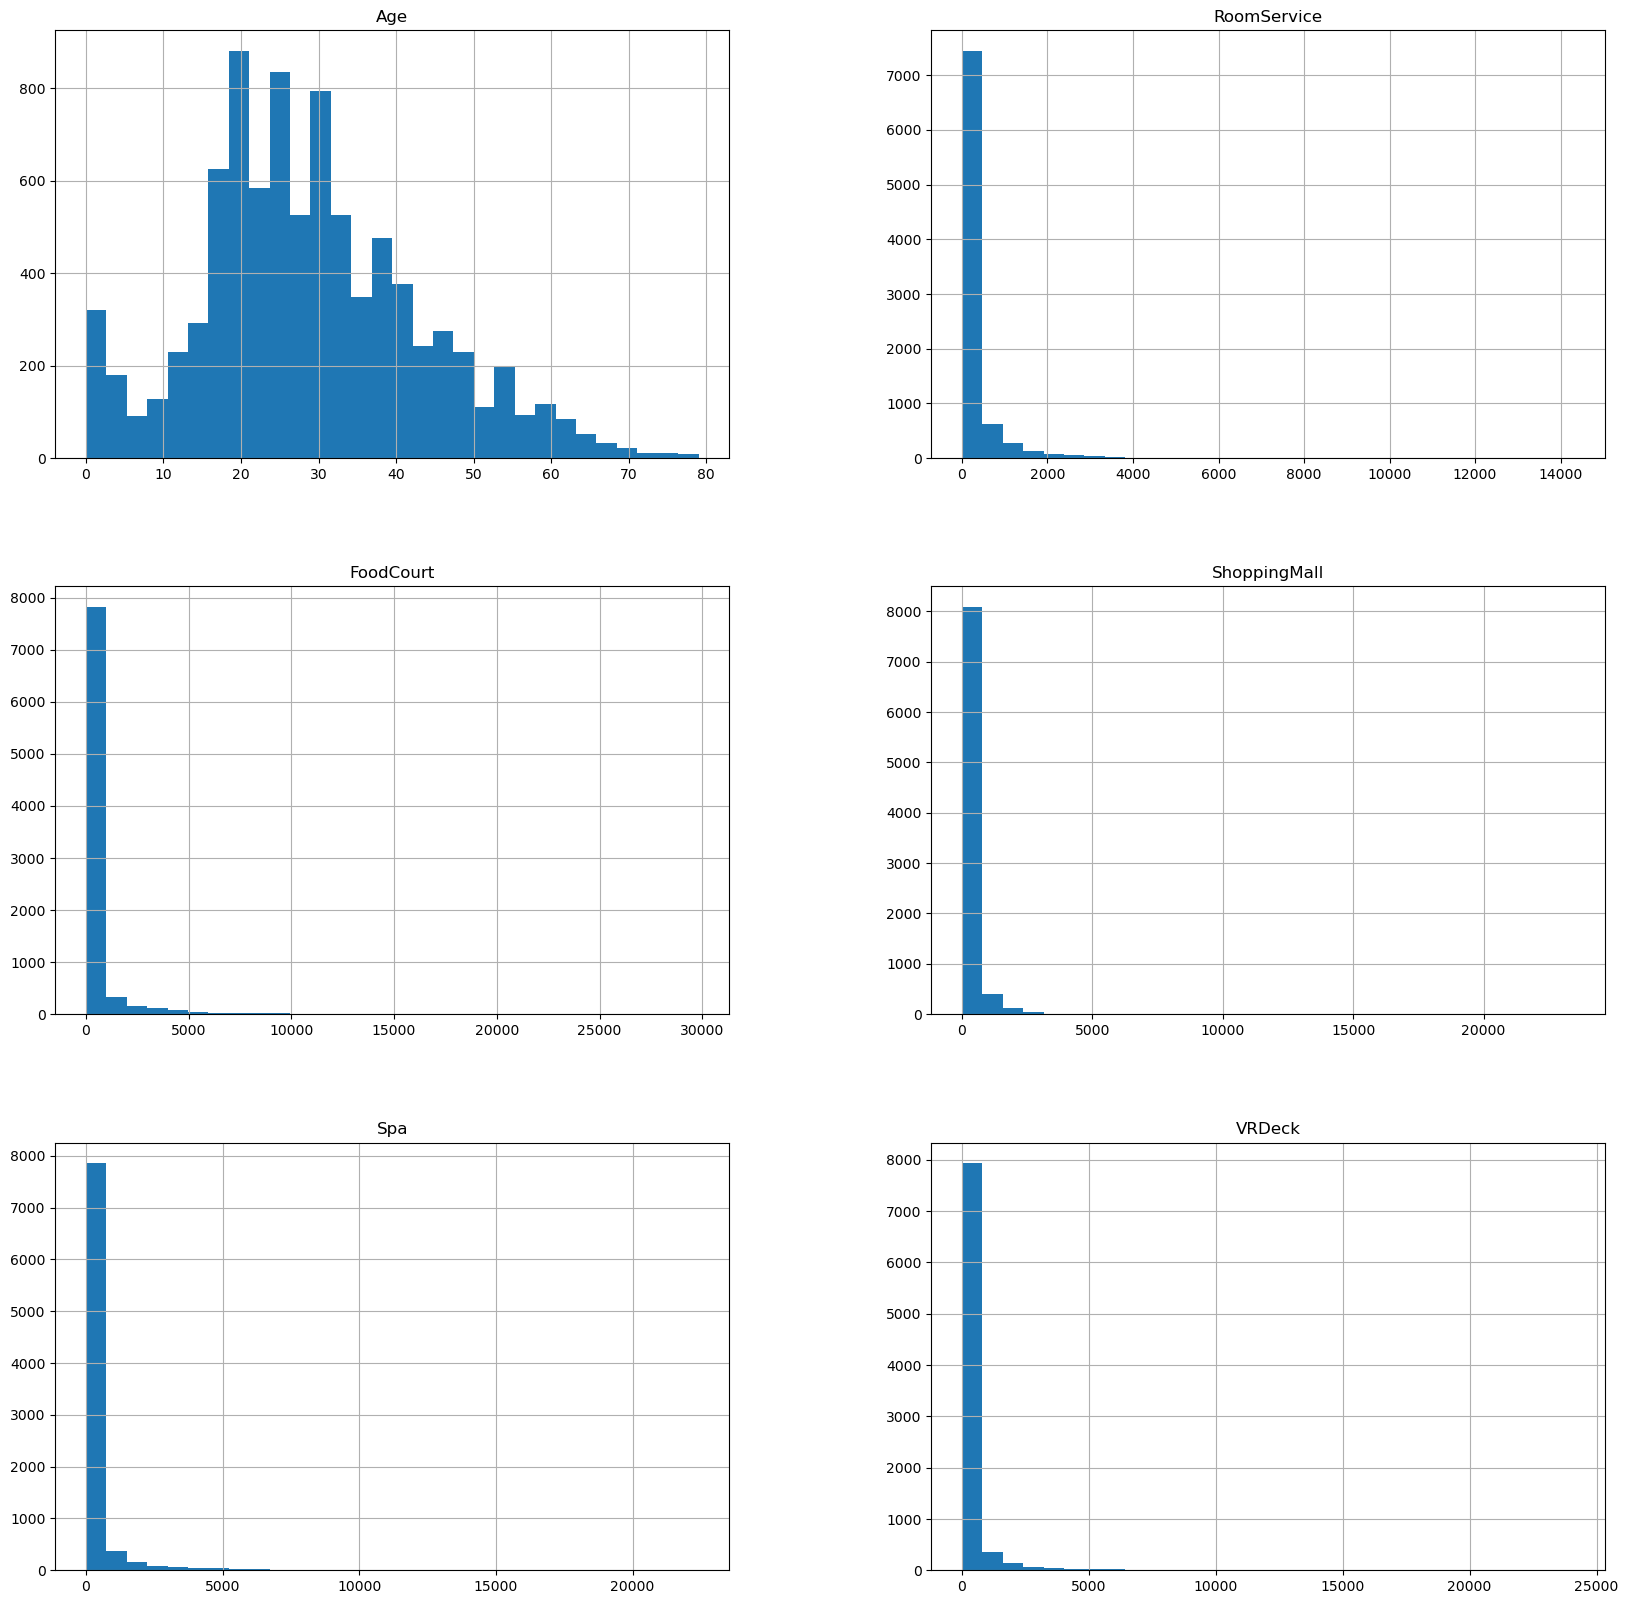

In [60]:
train_df.hist(bins=30, figsize=(20,20))

<AxesSubplot:>

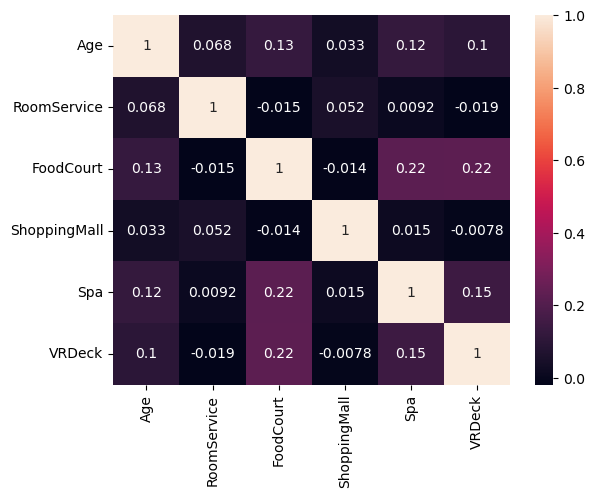

In [61]:
correlations = train_df.corr()
sns.heatmap(correlations, annot=True)

In [62]:
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1


<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

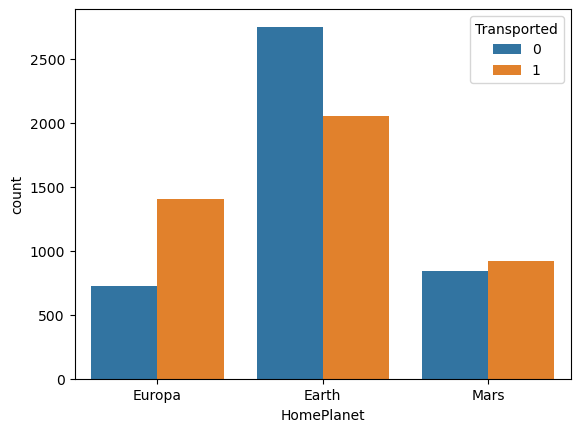

In [63]:
sns.countplot(data=train_df, x='HomePlanet', hue='Transported')

<AxesSubplot:xlabel='Destination', ylabel='count'>

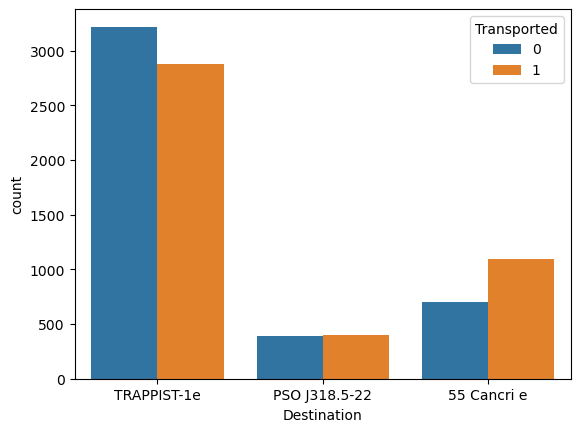

In [64]:
sns.countplot(data=train_df, x='Destination', hue='Transported')

<AxesSubplot:xlabel='Destination', ylabel='count'>

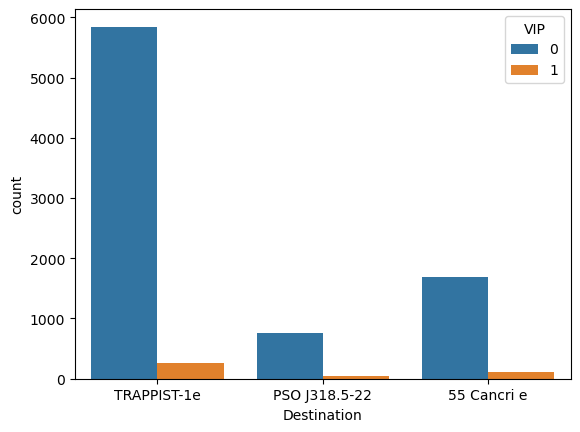

In [65]:
sns.countplot(data=train_df, x='Destination', hue='VIP')

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

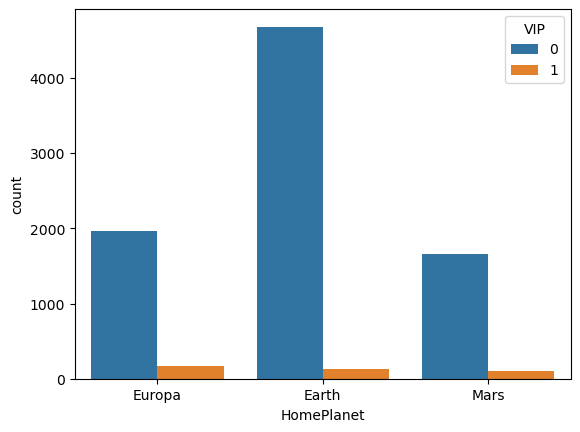

In [66]:
sns.countplot(data=train_df, x='HomePlanet', hue='VIP')

## Applying ML Algorithm

In [67]:
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1


In [68]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,1,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,0,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,1,55 Cancri e,31.0,0,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,0,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,0,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,0.0,0.0


In [69]:
from sklearn.preprocessing import OneHotEncoder

le = OneHotEncoder()

categ_cols = test_df[['HomePlanet', 'Destination']]

le = le.fit_transform(categ_cols).toarray()

le = pd.DataFrame(le)

test_df = pd.concat([test_df, le], axis=1)

test_df.drop(['HomePlanet', 'Destination'], axis=1, inplace=True)

In [70]:
test_passenger_id = test_df[['PassengerId']]
test_passenger_id

,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01
...,...
4272,9266_02
4273,9269_01
4274,9271_01
4275,9273_01


In [71]:
test_df.drop(['PassengerId'], axis=1, inplace=True)

In [72]:
test_df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,0,1,2,3,4,5
0,1,27.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,20.0,0,10.0,0.0,635.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,34.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4273,0,42.0,0,0.0,847.0,17.0,10.0,144.0,1.0,0.0,0.0,0.0,0.0,1.0
4274,1,29.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4275,0,29.0,0,0.0,2680.0,0.0,0.0,523.0,0.0,1.0,0.0,0.0,1.0,0.0


In [73]:
from sklearn.preprocessing import OneHotEncoder

le = OneHotEncoder()

categ_cols = train_df[['HomePlanet', 'Destination']]

le = le.fit_transform(categ_cols).toarray()

le

array([[0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 1.]])

In [74]:
type(le)

numpy.ndarray

In [75]:
le = pd.DataFrame(le)
type(le)

pandas.core.frame.DataFrame

In [76]:
train_df = pd.concat([train_df, le], axis=1)
train_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,0,1,2,3,4,5
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,1.0
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1.0,0.0,0.0,0.0,0.0,1.0
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0.0,1.0,0.0,0.0,0.0,1.0
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0.0,1.0,0.0,0.0,0.0,1.0
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0.0,1.0,0.0,1.0,0.0,0.0
8689,Earth,1,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,1.0,0.0
8690,Earth,0,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,1.0,0.0,0.0,0.0,0.0,1.0
8691,Europa,0,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,0.0,1.0,0.0,1.0,0.0,0.0


In [77]:
train_df.drop(['HomePlanet', 'Destination'], axis=1, inplace=True)

In [78]:
train_df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,0,1,2,3,4,5
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,1.0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1.0,0.0,0.0,0.0,0.0,1.0
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0.0,1.0,0.0,1.0,0.0,0.0
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,1.0,0.0
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,1.0,0.0,0.0,0.0,0.0,1.0
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,0.0,1.0,0.0,1.0,0.0,0.0


In [79]:
train_df.dtypes

CryoSleep        object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported      object
0               float64
1               float64
2               float64
3               float64
4               float64
5               float64
dtype: object

In [80]:
train_df[['CryoSleep', 'VIP', 'Transported']] = train_df[['CryoSleep', 'VIP', 'Transported']].astype('int64')

In [81]:
test_df[['CryoSleep', 'VIP']] = train_df[['CryoSleep', 'VIP']].astype('int64')

In [82]:
train_df.dtypes

CryoSleep         int64
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported       int64
0               float64
1               float64
2               float64
3               float64
4               float64
5               float64
dtype: object

In [83]:
test_df.dtypes

CryoSleep         int64
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
0               float64
1               float64
2               float64
3               float64
4               float64
5               float64
dtype: object

In [84]:
train_df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,0,1,2,3,4,5
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,1.0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1.0,0.0,0.0,0.0,0.0,1.0
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0.0,1.0,0.0,1.0,0.0,0.0
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,1.0,0.0
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,1.0,0.0,0.0,0.0,0.0,1.0
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,0.0,1.0,0.0,1.0,0.0,0.0


In [85]:
from sklearn.model_selection import train_test_split

X = train_df.drop('Transported', axis=1).values
y = train_df['Transported']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

In [86]:
X_train.shape, X_test.shape

((6085, 14), (2608, 14))

In [87]:
y_train.shape, y_test.shape

((6085,), (2608,))

In [88]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Decision Tree

In [89]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.7423312883435583


<AxesSubplot:>

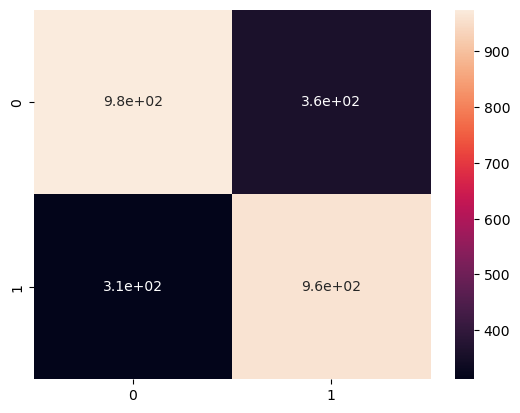

In [90]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74      1335
           1       0.73      0.75      0.74      1273

    accuracy                           0.74      2608
   macro avg       0.74      0.74      0.74      2608
weighted avg       0.74      0.74      0.74      2608



### Naive Bayes

In [92]:
from sklearn.naive_bayes import MultinomialNB

In [93]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

y_pred = naive_bayes.predict(X_test)

In [94]:
print(accuracy_score(y_test, y_pred))

0.7799079754601227


<AxesSubplot:>

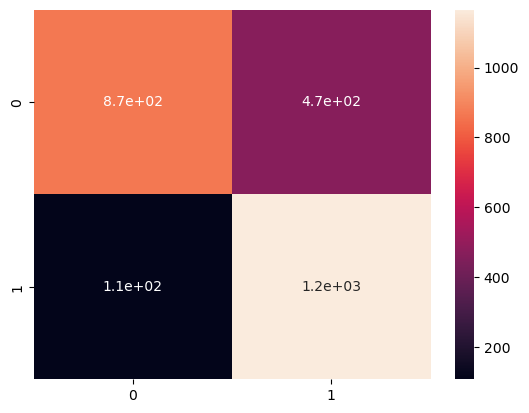

In [95]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.65      0.75      1335
           1       0.71      0.92      0.80      1273

    accuracy                           0.78      2608
   macro avg       0.80      0.78      0.78      2608
weighted avg       0.80      0.78      0.78      2608



### Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
logistic_regression = LogisticRegression()

logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [99]:
print(accuracy_score(y_test, y_pred))

0.7963957055214724


<AxesSubplot:>

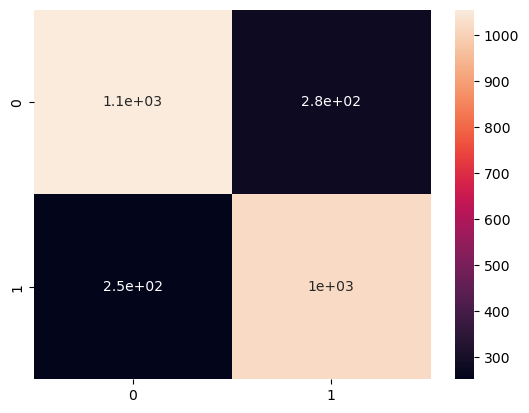

In [100]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [101]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1335
           1       0.79      0.80      0.79      1273

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608



### Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
random_forest = RandomForestClassifier()

random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [104]:
print(accuracy_score(y_test, y_pred))

0.7917944785276073


<AxesSubplot:>

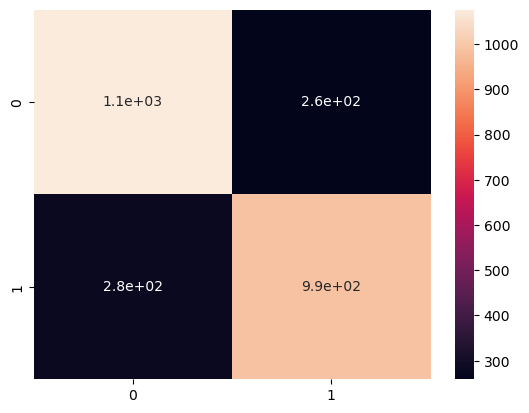

In [105]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1335
           1       0.79      0.78      0.78      1273

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608



## KNN

In [107]:
from sklearn.neighbors import KNeighborsClassifier

In [108]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [109]:
print(accuracy_score(y_test, y_pred))

0.7653374233128835


<AxesSubplot:>

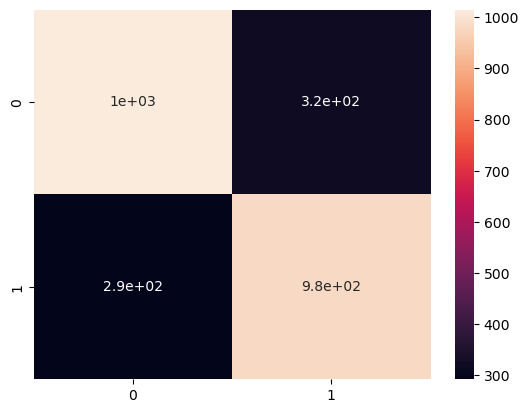

In [110]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [111]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1335
           1       0.75      0.77      0.76      1273

    accuracy                           0.77      2608
   macro avg       0.77      0.77      0.77      2608
weighted avg       0.77      0.77      0.77      2608



## Applying the best model on the test dataset

In [112]:
y_pred_test = knn.predict(test_df.values)

## Submiting the results

In [113]:
submission = pd.DataFrame({
    "PassengerId": test_passenger_id['PassengerId'],
    'Transported': y_pred_test
})

In [114]:
for i in submission.index:
  if submission['Transported'][i] == 0:
    submission['Transported'][i] = False
  elif submission['Transported'][i] == 1:
    submission['Transported'][i] = True

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [115]:
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [116]:
submission.to_csv('submission.csv', index=False)